In [2]:
import os
os.chdir('../')  # Moving up one directory to the root

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.data_processing import DataProcessor 
from utils.dataVisualizer import DataVisualizer
from models.sentiment_model import ModelTrainer

2024-12-11 09:53:15.571515: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Create instances
dataVisualizer = DataVisualizer()
processor = DataProcessor()
trainer = ModelTrainer() 

In [4]:
df = processor.load_data()

In [5]:
# Analyze ratings distribution
dataVisualizer.analyze_ratings_distribution(df)

# Analyze sentiment distribution on the imbalanced dataset in terms of sentiment
dataVisualizer.analyze_sentiment_distribution(df)


Rating Distribution:
Rating 0: 130,000 reviews (20.0%)
Rating 1: 130,000 reviews (20.0%)
Rating 2: 130,000 reviews (20.0%)
Rating 3: 130,000 reviews (20.0%)
Rating 4: 130,000 reviews (20.0%)

Sentiment Distribution:
Neutral: 260,000
Positive: 130,000
Positive: 260,000


In [6]:
df_balanced = processor.create_balanced_dataset(df)

In [7]:
print(f"Total samples: {len(df_balanced)}")
dataVisualizer.analyze_sentiment_distribution(df_balanced)

Total samples: 15000

Sentiment Distribution:
Neutral: 5,000
Positive: 5,000
Positive: 5,000


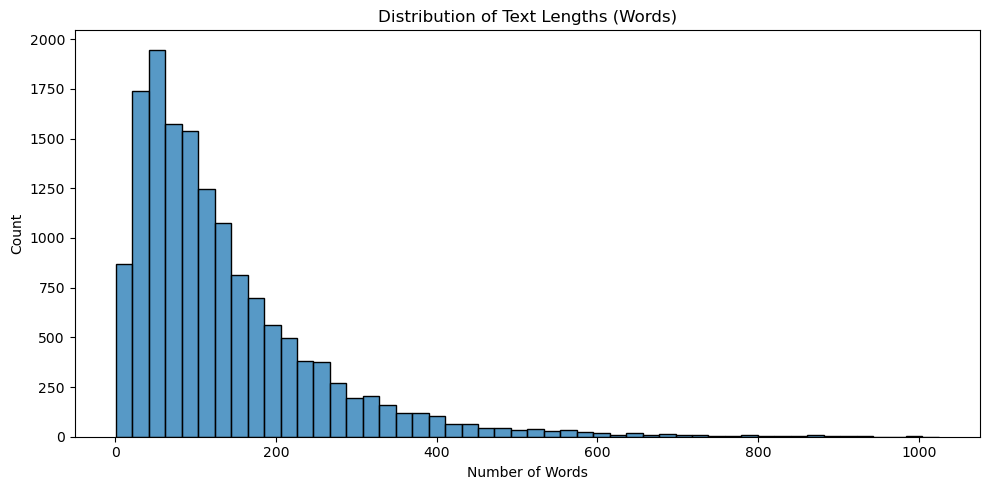


Text Length Statistics:

Word counts:
Average length: 135.2 words
Median length: 101.0 words
Max length: 1025 words
Min length: 1 words


In [8]:
dataVisualizer.analyze_text_lengths(df_balanced['text'])

In [9]:
sample_texts = df_balanced['text'].head(5)

print("Detailed preprocessing examples from dataset:\n")
for text in sample_texts:
    processed, is_sarcastic = processor.preprocess_text(text)
    print(f"Original: {text}\n\n")
    print(f"Processed: {processed}\n\n")
    print(f"Sarcastic: {is_sarcastic}\n\n")
    print("-" * 80 + "\n")

Detailed preprocessing examples from dataset:

Original: We went to Harumi sushi yesterday (just 4 min walk from Hyatt hotel) looking for dinner.\n\nWhen we arrived we were warmly greeted and were immediately assigned a table. \n\nLooking at the menu I noticed the wide selection of sashimi, nigiri and rolls.\n\nI decided to try the OMG roll and the rainbow roll. The food arrived almost straight away and the OMG roll was brought by chef Juno. It was in tinfoil and on fire. The tinfoil was then removed to put out the fire. \n\nThe OMG roll tasted delicious combining the sweetness of the eel, sharpness if the fish, and softness of the avocado. The rainbow roll also tasted delicious. \n\nWe were also given free miso and edamame after logging in via Yelp! \n\nFollowing that, we ordered the tempura shrimp roll that was nice and crispy on the inside. \n\nWe were then seen on our way out by Juno the chef and owner who was very kind!\n\nI went back the next day for lunch and was again immensely

In [10]:
processed_texts, analysis = processor.process_batch(df['text'])

print("Batch Analysis Statistics:")
print(f"Sarcasm detected: {analysis['sarcasm_count']}")
print(f"Negations found: {analysis['negation_count']}")
print(f"Special tokens: {analysis['special_tokens_count']}")
print(f"URLs found: {analysis['url_count']}")


Batch Analysis Statistics:
Sarcasm detected: 759
Negations found: 538305
Special tokens: 0
URLs found: 8541


In [11]:
print("Data Quality Checks:")
print("\nNull values:")
print(df_balanced.isnull().sum())
print("\nDuplicate rows:", df_balanced.duplicated().sum())

Data Quality Checks:

Null values:
label        0
text         0
sentiment    0
dtype: int64

Duplicate rows: 0


Token Length Statistics:
Mean: 145.5
Median: 135.0
95th percentile: 256.0
Max: 256


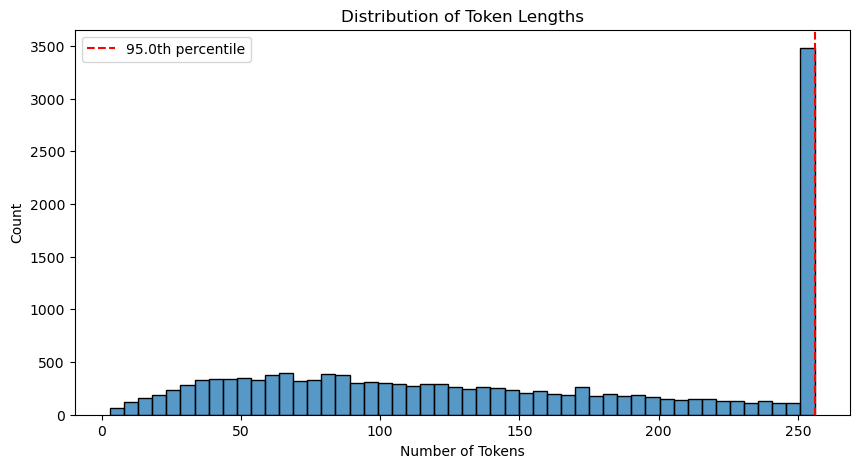


Recommended MAX_LENGTH: 256


In [12]:
# Get tokenized dataset from ModelTrainer
encoded_data = trainer.prepare_dataset(df_balanced['text'])

# Analyze token lengths
suggested_length = dataVisualizer.analyze_token_lengths(encoded_data)
MAX_LENGTH = min(512, (suggested_length + 15) // 16 * 16)
print(f"\nRecommended MAX_LENGTH: {MAX_LENGTH}")

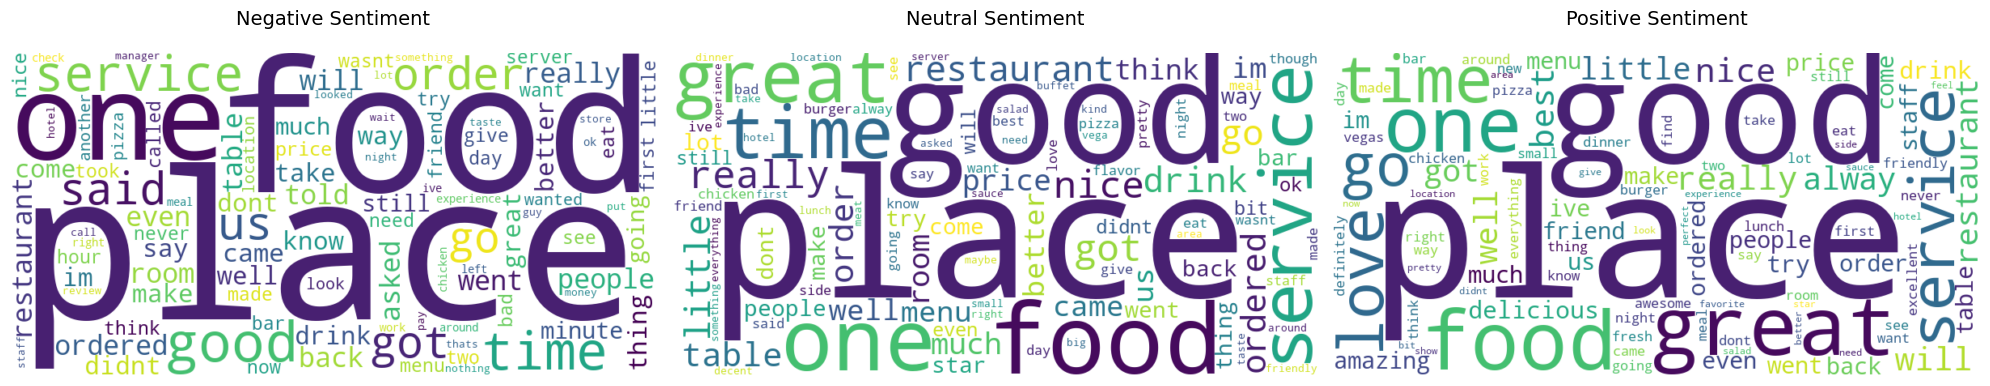


Most Common Words by Sentiment:

Negative:
  the: 36831
  and: 22402
  to: 20460
  was: 14474
  of: 10498
  it: 9792
  for: 8556
  in: 8246
  that: 7504
  my: 6766

Neutral:
  the: 37144
  and: 21108
  to: 15903
  was: 13767
  of: 11235
  it: 10105
  for: 8401
  is: 8241
  in: 7687
  but: 7569

Positive:
  the: 28793
  and: 20326
  to: 13178
  of: 9272
  was: 8869
  is: 7876
  it: 6947
  for: 6755
  in: 6724
  with: 4943


In [13]:
dataVisualizer.visualize_wordclouds(df_balanced)

In [14]:
DataVisualizer.display_processed_reviews(df_balanced)  # Since it's a static method


Review #11499

Original Text:
I had the Maximilian and it was good.  Lots of potatoes, eggs, salsa, green chiles, and a yummy tortilla.  The serving sizes are big but the food is good.  The coffee was okay... a bit on the weak sid...

Processed Text:
i had the maximilian and it was good. lots of potatoes, eggs, salsa, green chiles, and a yummy tortilla. the serving sizes are big but the food is good. the coffee was okay ELLIPSIS  a bit on the weak...

Labels:
- Sentiment: 1 (Neutral)
- Sarcasm Detected: False
- Contains Negation: False
- Polarity Score: 0.70

Review #6475

Original Text:
I get take-out from here occasionally, purely out of convenience and lack of competition.  During my last pick-up, the evening of 6-22-12, I witnessed a patron quietly complaining about the confusion ...

Processed Text:
i get take-out from here occasionally, purely out of convenience and lack of competition. during my last pick-up, the evening of 6-22-12, i witnessed a patron quietly complaining abou

Processing texts... This may take a while...



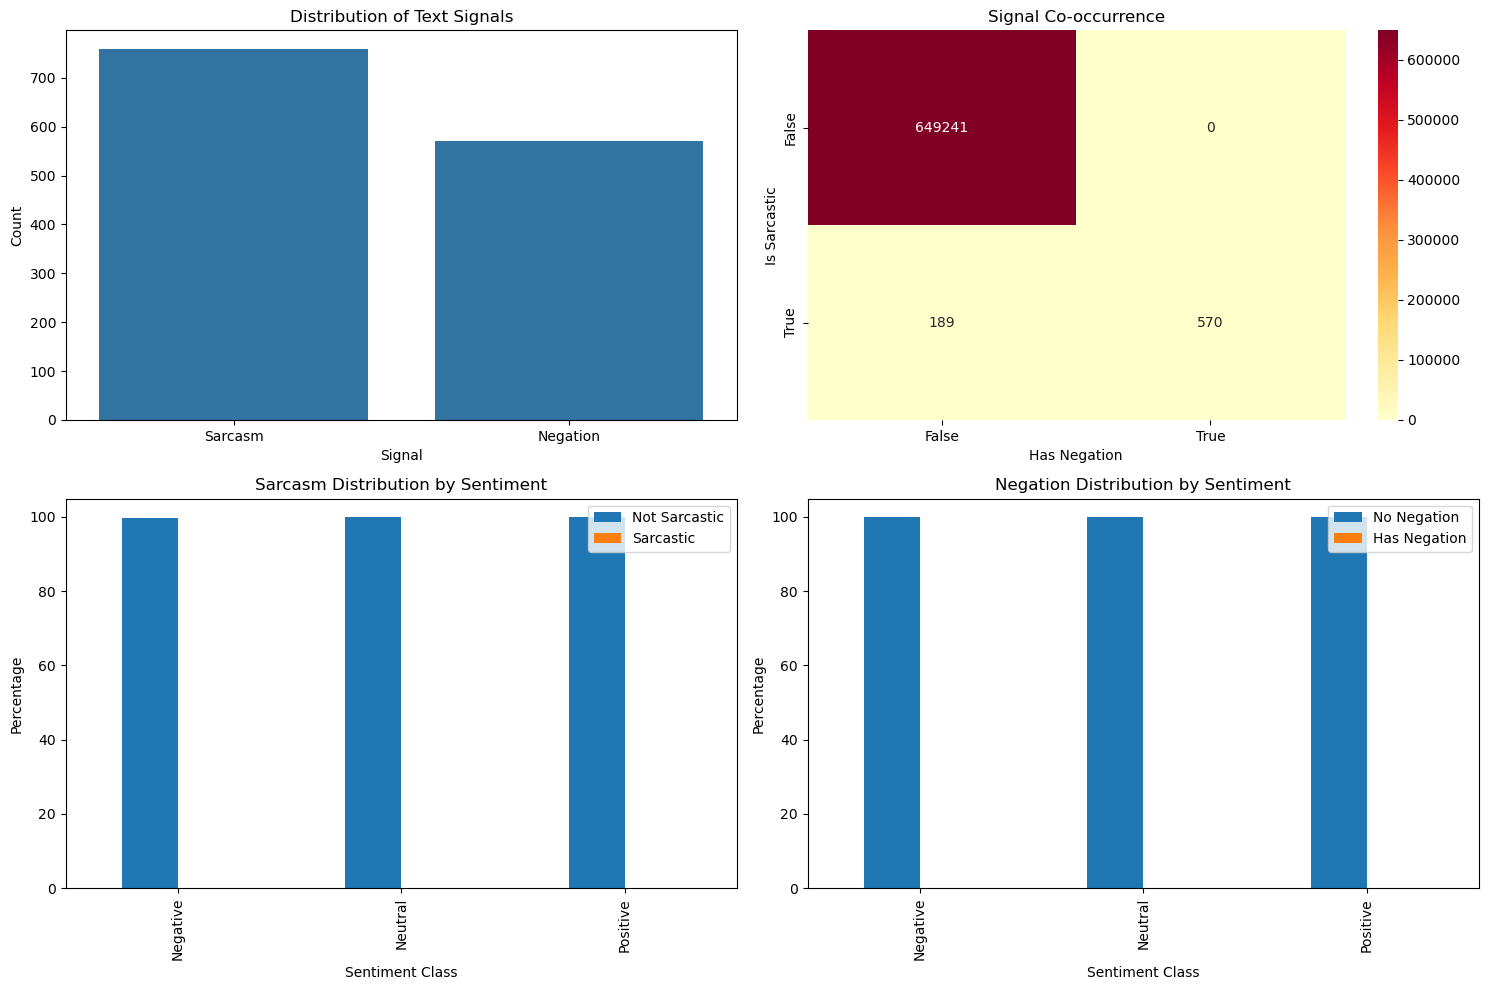


=== Text Signal Analysis ===
Total Reviews Analyzed: 650,000

Sarcasm Detection:
- Reviews with sarcasm: 759 (0.12%)
- Reviews without sarcasm: 649,241 (99.88%)

Negation Analysis:
- Reviews with negation: 570 (0.09%)
- Reviews without negation: 649,430 (99.91%)

Signal Co-occurrence:
has_negation   False  True 
sarcastic                  
False         649241      0
True             189    570

Distribution across Sentiment Classes:

Counts for each combination (sentiment, sarcasm, negation):
sarcastic      False True       
has_negation   False False True 
sentiment                       
0             259535   150   315
1             129882    24    94
2             259824    15   161
Processing texts... This may take a while...



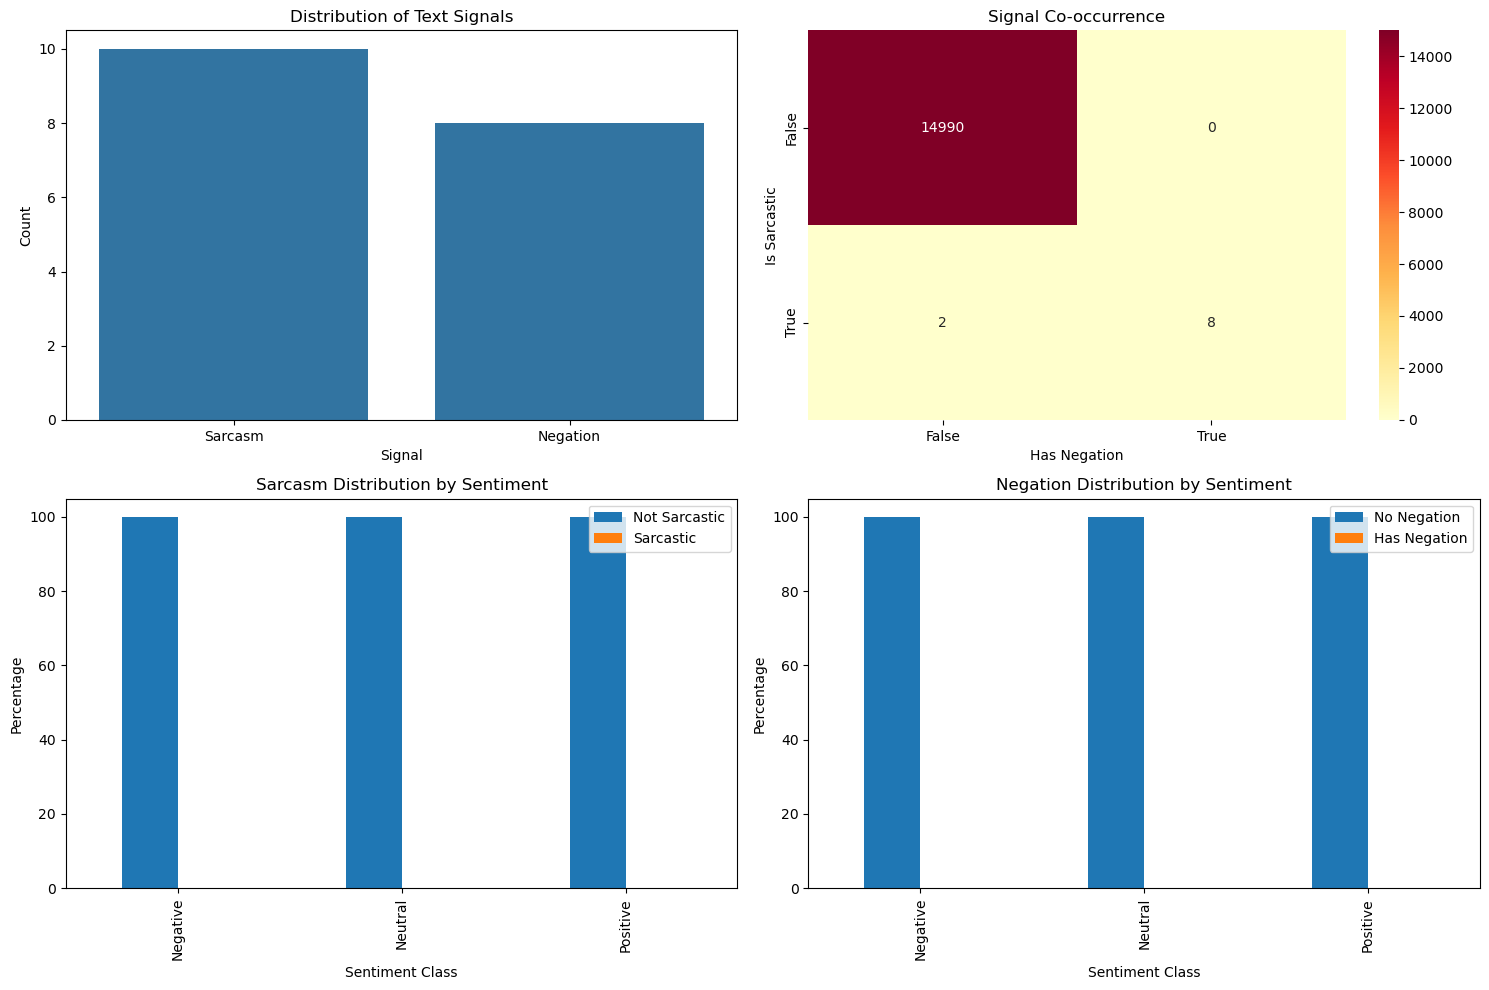


=== Text Signal Analysis ===
Total Reviews Analyzed: 15,000

Sarcasm Detection:
- Reviews with sarcasm: 10 (0.07%)
- Reviews without sarcasm: 14,990 (99.93%)

Negation Analysis:
- Reviews with negation: 8 (0.05%)
- Reviews without negation: 14,992 (99.95%)

Signal Co-occurrence:
has_negation  False  True 
sarcastic                 
False         14990      0
True              2      8

Distribution across Sentiment Classes:

Counts for each combination (sentiment, sarcasm, negation):
sarcastic    False True       
has_negation False False True 
sentiment                     
0             4995     1     4
1             4997     1     2
2             4998     0     2


In [15]:
# For the full dataset
dataVisualizer.analyze_text_signals(df)

# for the balanced dataset
dataVisualizer.analyze_text_signals(df_balanced)